In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import os
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.pyplot as plt
from pykowski.karambola import KarambolaResults
import numpy as np
import json
import os
from collections import defaultdict
import mplstereonet
import matplotlib
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
resolution_file = "image_data/resolutions.json"
with open(resolution_file) as data_file:
    resolutions = json.load(data_file)
    
dimensions_file = "image_data/dimensions.json"
with open(dimensions_file) as data_file:
    dimensions = json.load(data_file)

sample_names =["beadpack", "ketton", "estaillades"]

In [3]:
minkowski_data = {}
for sample_name in sample_names:
    minkowski_data[sample_name] = {}
    
    json_files = []
    
    for file in os.listdir("minkowski_results/karambola_output/"+sample_name):
        if file.endswith(".json"):
            json_files.append(file)

    dxs = []
    results = []
    for file_name in json_files:
        data = None
        with open("minkowski_results/karambola_output/"+sample_name+"/"+file_name, 'r') as f:
            for row in f:
                data = row
        name = file_name.split("_")
        dx = int(name[0])
        json_data = json.loads(data)
        karam_res = KarambolaResults()
        karam_res.load_from_json_format(json_data)
        #if karam_res.w202 is not 'ERROR' and karam_res.w102 is not 'ERROR':
        try:
            karam_res.compute_eigenvalues()
            dxs.append(dx)
            results.append(karam_res)
        except:
            print "Non-Manifold mesh in "+file_name

                
    w102s = [x.w102 for x in results]
    
    beta_102s = [x.beta_102 for x in results]
    beta_202s = [x.beta_202 for x in results]
    gamma_102s = [x.gamma_102 for x in results]
    gamma_202s = [x.gamma_202 for x in results]
    
    dxs_sorted = sorted(dxs)
    
    w102s_sorted = [x for (y,x) in sorted(zip(dxs, w102s))]
    
    beta_102s_sorted = [x for (y,x) in sorted(zip(dxs, beta_102s))]
    beta_202s_sorted = [x for (y,x) in sorted(zip(dxs, beta_202s))]
    gamma_102s_sorted = [x for (y,x) in sorted(zip(dxs, gamma_102s))]
    gamma_202s_sorted = [x for (y,x) in sorted(zip(dxs, gamma_202s))]
    
    minkowski_data[sample_name]["dx"] = dxs_sorted
    
    minkowski_data[sample_name]["w102"] = w102s_sorted
    
    minkowski_data[sample_name]["beta_102"] = beta_102s_sorted
    minkowski_data[sample_name]["beta_202"] = beta_202s_sorted
    minkowski_data[sample_name]["gamma_102"] = gamma_102s
    minkowski_data[sample_name]["gamma_202"] = gamma_202s

In [18]:
stereonet_data = {}
for name in sample_names:
    stereonet_data[name] = {}
    vectors = []

    vectors_1 = []
    vectors_2 = []
    vectors_3 = []
    eigens = []
    for tensor in minkowski_data[name]["w102"]:
        try:
            eig_vals, eig_vecs = np.linalg.eig(tensor)
        except:
            print tensor
            break
        v0 = eig_vecs[:, 0]
        v1 = eig_vecs[:, 1]
        v2 = eig_vecs[:, 2]
        eig_vecs_new = [v0, v1, v2]
        try:
            eig_vecs_sorted = [x for (y,x) in sorted(zip(eig_vals, eig_vecs_new))]
            vectors.append(eig_vecs_new[0])
            vectors.append(eig_vecs_new[1])
            vectors.append(eig_vecs_new[2])

            vectors_1.append(eig_vecs_sorted[0])
            vectors_2.append(eig_vecs_sorted[1])
            vectors_3.append(eig_vecs_sorted[2])
            eigens.append(list(np.divide(np.array(sorted(eig_vals)),np.sum(eig_vals))))
        except:
            pass
    stereonet_data[name]["vectors"] = vectors
    stereonet_data[name]["smallest"] = vectors_1
    stereonet_data[name]["intermediate"] = vectors_2
    stereonet_data[name]["largest"] = vectors_3
    print len(vectors_1)

241
244
235


In [19]:
cmap_blue = plt.cm.Blues
cmap_red = plt.cm.Reds
cmap_green = plt.cm.Greens

# Get the colormap colors
my_cmap_blue = cmap_blue(np.arange(cmap_blue.N))
my_cmap_red = cmap_red(np.arange(cmap_red.N))
my_cmap_green = cmap_green(np.arange(cmap_green.N))

my_cmap_blue[:,-1] =  np.linspace(0.2, 1, cmap_blue.N)
my_cmap_red[:,-1] =  np.linspace(0.2, 1, cmap_red.N)
my_cmap_green[:,-1] =  np.linspace(0.2, 1, cmap_green.N)

# Create new colormap
my_cmap_blue = ListedColormap(my_cmap_blue)
my_cmap_red = ListedColormap(my_cmap_red)
my_cmap_green = ListedColormap(my_cmap_green)

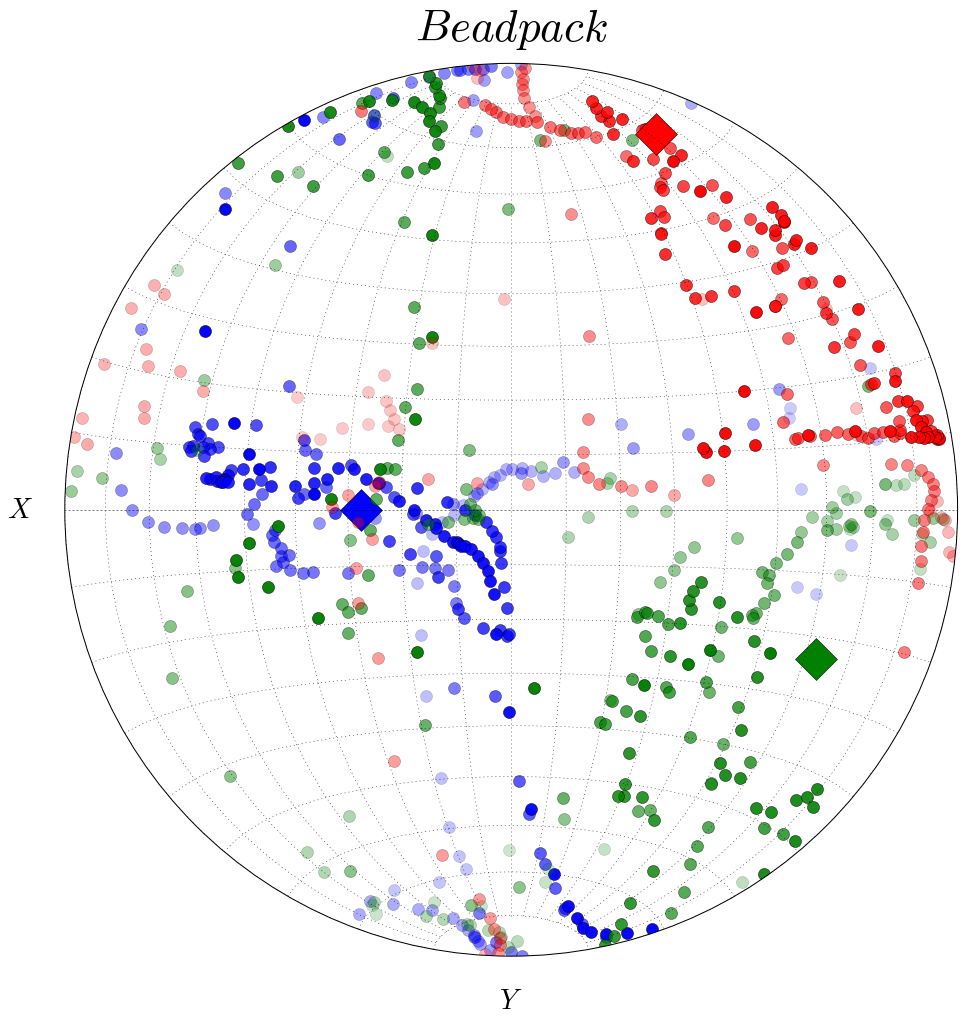

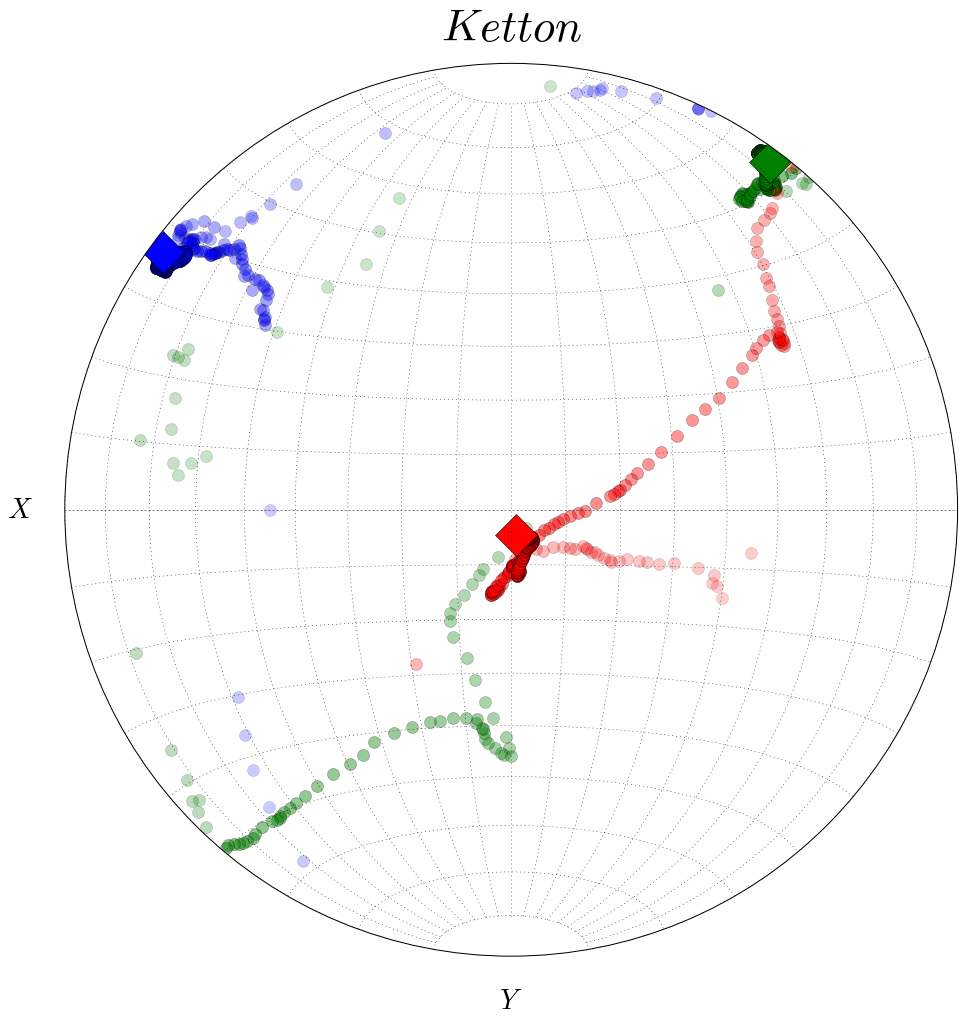

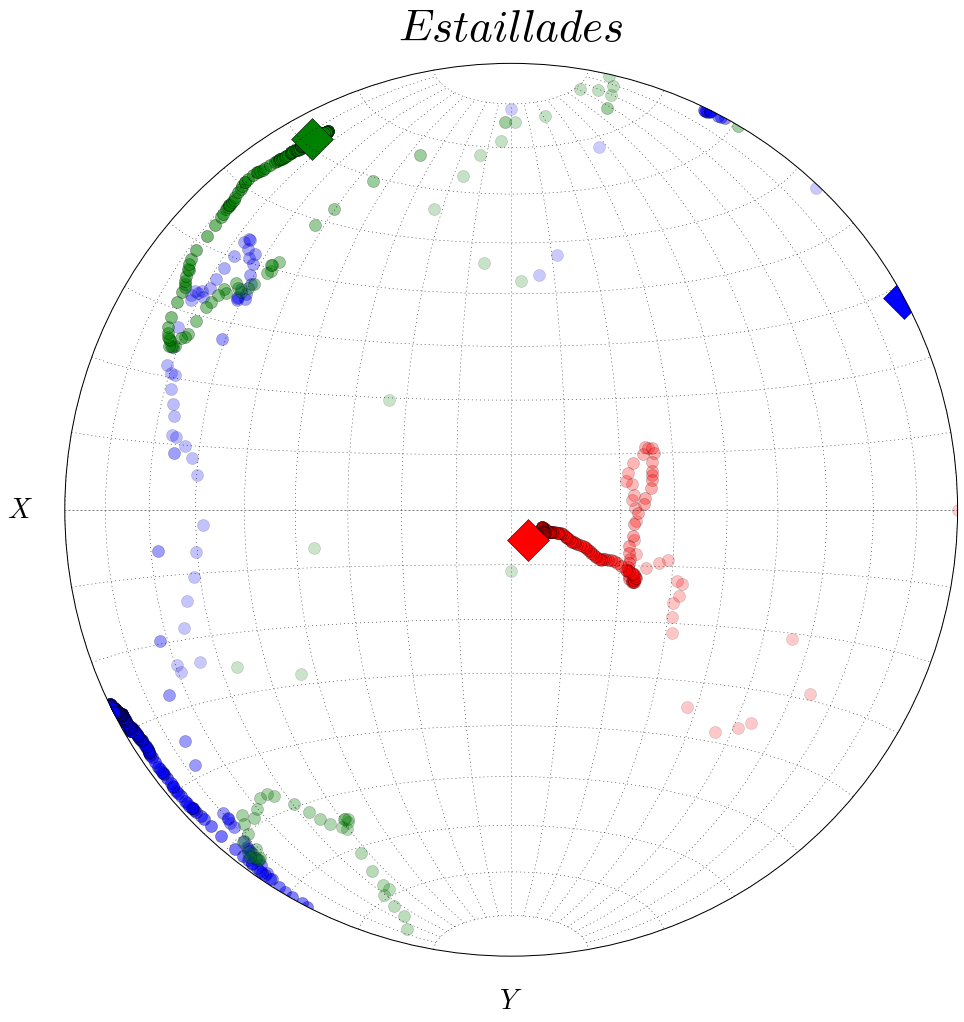

In [20]:
for name in sample_names:
    fig, ax = mplstereonet.subplots(projection='equal_area', figsize=(16,16))
    
    ax.set_title(r'$'+name.title()+'$', size=45, y=1.02)
    
    norm1 = matplotlib.colors.Normalize(vmin=0, vmax=100)

    
    norm2 = matplotlib.colors.Normalize(vmin=0, vmax=100)

    
    norm3 = matplotlib.colors.Normalize(vmin=0, vmax=100)

    if name == "nope":
        ax1 = fig.add_axes([1., 0.25, 0.02, 0.5])
        ax2 = fig.add_axes([1.02, 0.25, 0.02, 0.5])
        ax3 = fig.add_axes([1.04, 0.25, 0.02, 0.5])

        cb1 = matplotlib.colorbar.ColorbarBase(ax1, cmap=cmap_blue,
                                            norm=norm1,
                                            orientation='vertical')
        cb2 = matplotlib.colorbar.ColorbarBase(ax2, cmap=cmap_green,
                                                norm=norm2, orientation='vertical')
        cb3 = matplotlib.colorbar.ColorbarBase(ax3, cmap=cmap_red,
                                                norm=norm3,
                                                orientation='vertical')
        cb1.outline.set_visible(False)
        cb2.outline.set_visible(False)
        cb3.outline.set_visible(False)

        cb1.set_ticks([])
        cb2.set_ticks([])
        cb3.set_ticks([0, 25, 50, 75, 100])
        cb3.set_label(r'$Volume of Investigation, \ \% \ of \ image$', size=22)
        cb3.ax.tick_params(labelsize=20)
    
    #ax.set_title(name.title(), y=1.1, size=28)
    ax.grid(True)
    
    ax.set_azimuth_ticks([180, 270], labels=[r'$Y$', r'$X$'], size=28)
    
    vectors = stereonet_data[name]["vectors"]

    vectors_1 = stereonet_data[name]["smallest"]
    vectors_2 = stereonet_data[name]["intermediate"]
    vectors_3 = stereonet_data[name]["largest"]


    gradients = np.array(vectors)
    
    gradients_1 = np.array(vectors_1)
    gradients_2 = np.array(vectors_2)
    gradients_3 = np.array(vectors_3)
    
    x_1, y_1, z_1 = gradients_1.T
    x_2, y_2, z_2 = gradients_2.T
    x_3, y_3, z_3 = gradients_3.T
    for i, ( x, y, z) in enumerate(zip(x_1, y_1, z_1)):     
        if i == len(x_1)-1:
            ax.pole(*mplstereonet.vector2pole(x,y,z), marker='D', color="blue", alpha=0.2+(0.8/float(x_1.shape[0]))*i, ms=30, label=r"$Smallest \ Eigenvalue \ Direction$")
        else:
            ax.pole(*mplstereonet.vector2pole(x,y,z), color="blue", alpha=0.2+(0.8/float(x_1.shape[0]))*i, ms=12)
            
    
    for i, ( x, y, z) in enumerate(zip(x_2, y_2, z_2)):
        if i == len(x_2)-1:
            ax.pole(*mplstereonet.vector2pole(x,y,z), marker='D', color="green", alpha=0.2+(0.8/float(x_1.shape[0]))*i, ms=30, label=r"$Intermediate \ Eigenvalue \ Direction$")
        else:
            ax.pole(*mplstereonet.vector2pole(x,y,z), color="green", alpha=0.2+(0.8/float(x_2.shape[0]))*i, ms=12)
    
    for i, ( x, y, z) in enumerate(zip(x_3, y_3, z_3)):
        if i == len(x_2)-1:
            ax.pole(*mplstereonet.vector2pole(x,y,z), marker='D', color="red", alpha=0.2+(0.8/float(x_1.shape[0]))*i, ms=30, label=r"$Largest \ Eigenvalue \ Direction$")
        else:
            ax.pole(*mplstereonet.vector2pole(x,y,z), color="red", alpha=0.2+(0.8/float(x_3.shape[0]))*i, ms=12)
            
    x,y,z = gradients.T
    cax = ax.density_contour(*mplstereonet.vector2pole(x,y,z), measurement='poles', cmap="gist_earth", sigma=2.0, linewidth=4)
    if name == "nope":
        lgd = ax.legend(bbox_to_anchor=(1.2, 0), numpoints=1, fontsize=34)
        fig.savefig("minkowski_results/stereonet_figures/"+name+"_tensor_directions_new.png", bbox_extra_artists=(lgd,ax1, ax2, ax3), bbox_inches='tight', dpi=300)
    else:
        fig.savefig("minkowski_results/stereonet_figures/"+name+"_tensor_directions_new.png", bbox_extra_artists=None, bbox_inches='tight', dpi=300)